In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

import keras 
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.utils import np_utils

Using TensorFlow backend.


### Dataset Preparation and preprocessing

In [2]:
dataset=pd.read_csv(r"./fashion-mnist-test.csv")

In [3]:
dataset.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0


In [4]:
dataset=dataset.values

In [5]:
labeldict={0:"T-shirt",1:"Trouser",3:"Dress",2:"Pullover",4:"Coat",5:"Sandal",6:"shirt",7:"Sneaker",8:"Bag",9:"ankle boot"}
labeldict[1]

'Trouser'

#### Plot FashionImage

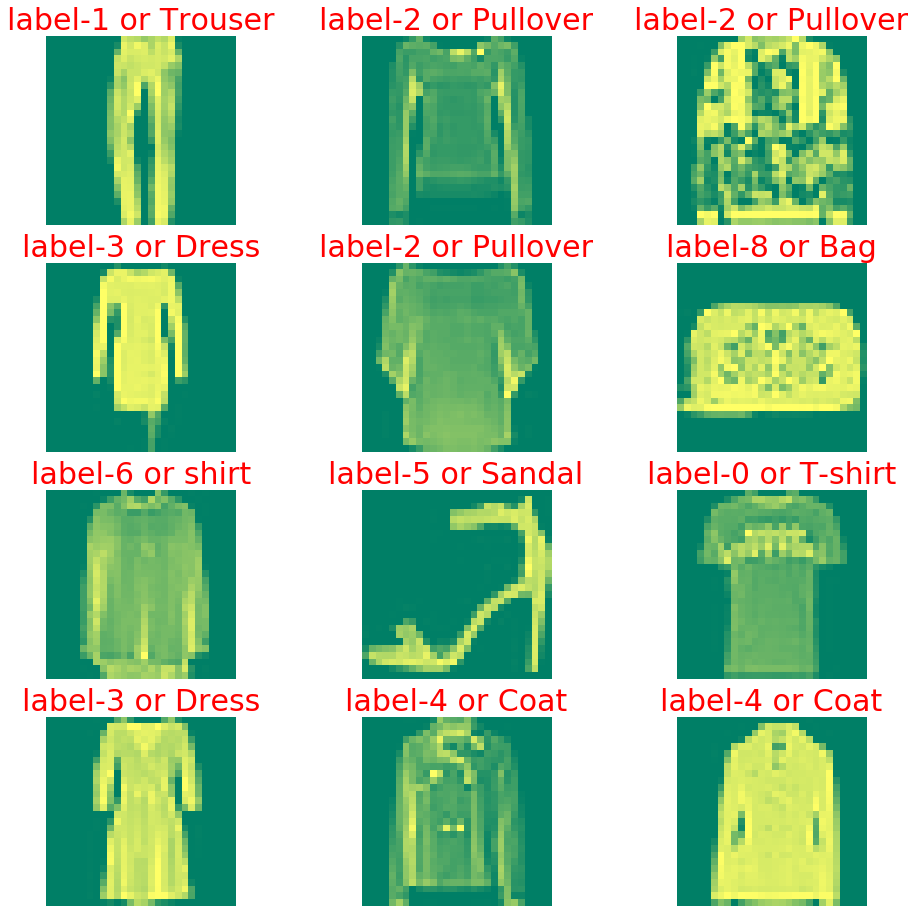

In [6]:

plt.figure(figsize=(16,16))
for i in range(1,13):
    image=dataset[i,1:].reshape(28,28)
    plt.subplot(4,3,i)
    label=dataset[i,0]
    plt.title("label-{} or {}".format(label,labeldict[label]),color="red",fontsize=30)
    plt.axis("off")
    plt.imshow(image,cmap="summer")
    
plt.show()

### Dataset Split

In [7]:
X , Y = dataset[:,1:],dataset[:,0]

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)
print(x_train.shape,y_train.shape)

(8000, 784) (8000,)


In [13]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape,y_test.shape)

(8000, 10) (2000, 10)


## Keras Model Implementation

In [10]:
model = Sequential()

model.add(Dense(256,input_shape=(784,))) #784 X 256 + 256
model.add(Activation("tanh"))

model.add(Dense(64))                     #256 X 64 +64
model.add(Activation("tanh"))

model.add(Dense(10))                     #64 X 10 +10
model.add(Activation("softmax"))         

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


## Training Of Model

In [11]:
model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [14]:
Mnist_model=model.fit(
    x=x_train,
    y=y_train,
    batch_size=150,
    epochs=30,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=(x_test,y_test),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
)

Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 2s 254us/step - loss: 1.4880 - acc: 0.5296 - val_loss: 1.1491 - val_acc: 0.6430
Epoch 2/30
8000/8000 [==============================] - 0s 32us/step - loss: 1.0339 - acc: 0.6816 - val_loss: 0.9908 - val_acc: 0.6860
Epoch 3/30
8000/8000 [==============================] - 0s 31us/step - loss: 0.9205 - acc: 0.7119 - val_loss: 0.8890 - val_acc: 0.7070
Epoch 4/30
8000/8000 [==============================] - 0s 32us/step - loss: 0.8351 - acc: 0.7321 - val_loss: 0.8337 - val_acc: 0.7290
Epoch 5/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.7842 - acc: 0.7424 - val_loss: 0.7993 - val_acc: 0.7280
Epoch 6/30
8000/8000 [==============================] - 0s 38us/step - loss: 0.7563 - acc: 0.7477 - val_loss: 0.7667 - val_acc: 0.7500
Epoch 7/30
8000/8000 [==============================] - 0s 39us/step - loss: 0.7329 - acc: 0.

In [16]:
Mnist_model.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Loss and Accuracy Graph of Training and Testing Data

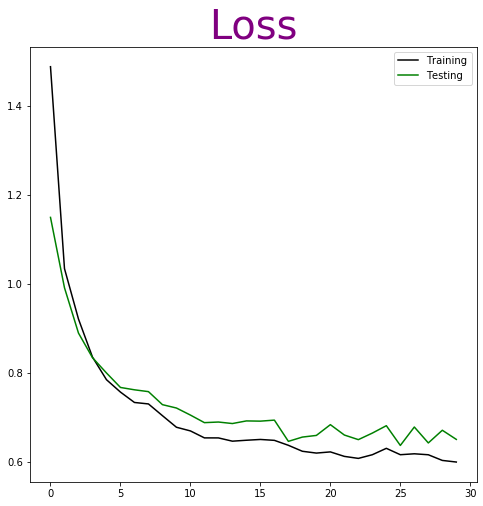

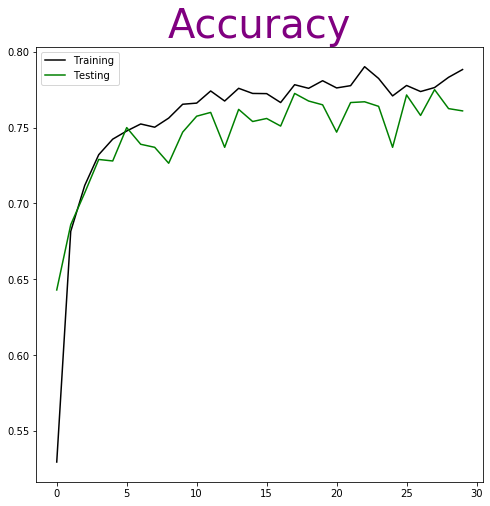

In [21]:
plt.figure(0,figsize=(8,8))
plt.title("Loss",fontsize=40,color="purple")
plt.plot(Mnist_model.history["loss"],color="black",label="Training")
plt.plot(Mnist_model.history["val_loss"],color="green",label="Testing")
plt.legend()
plt.show()


plt.figure(1,figsize=(8,8))
plt.title("Accuracy",fontsize=40,color="purple")
plt.plot(Mnist_model.history["acc"],color="black",label="Training",)
plt.plot(Mnist_model.history["val_acc"],color="green",label="Testing")
plt.legend()
plt.show()

## Prediction Using Model

In [26]:
prediction=model.predict(x_test)
print(prediction.shape)
prediction[1]

(2000, 10)


array([6.0407448e-01, 9.1561563e-03, 8.7743647e-02, 1.4577256e-02,
       2.3174450e-02, 8.3131921e-03, 2.2795130e-01, 6.5845123e-04,
       2.3864560e-02, 4.8646232e-04], dtype=float32)

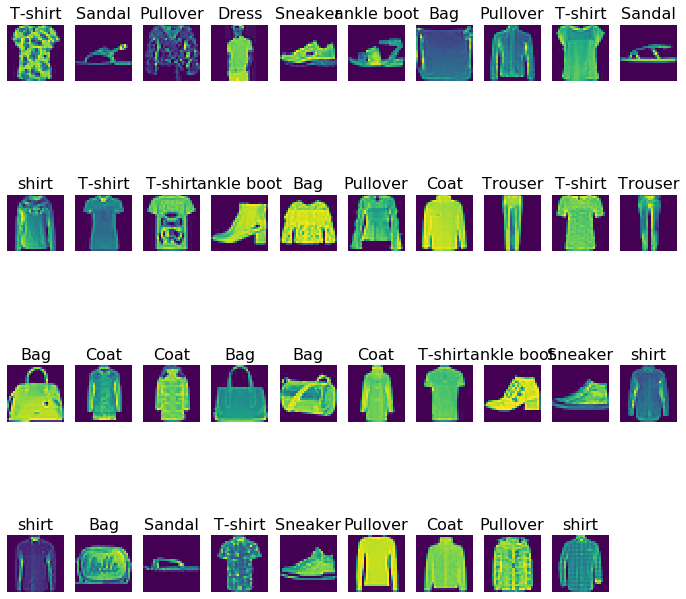

In [32]:
plt.figure(0,figsize=(12,12))
for i in range(1,40):
    plt.subplot(4,10,i)
    pred=prediction[i].argmax()
    plt.title("{}".format(labeldict[pred]),fontsize=16)
    
    img=x_test[i].reshape(28,28)
    plt.axis("off")
    plt.imshow(img)
plt.show()
    